In [46]:
# python version: python3

## DATA PREPARATION

### part a

General imports and getting training data from file to car_data dataframe.

In [47]:
import numpy as np
import os
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

#Get traing data from training.csv file to a car_data DataFrame
car_data = pd.read_csv("training.csv")
car_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,141.0,mpfi,NaN,3.15,9.5,114.0,5400.0,24.0,28.0,15985.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0,7349.0
2,gas,std,four,sedan,fwd,front,94.5,165.3,63.8,54.5,...,NaN,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0,6849.0
3,gas,std,four,sedan,rwd,front,104.5,187.8,66.5,54.1,...,171.0,mpfi,3.27,3.35,9.2,156.0,5200.0,20.0,24.0,15690.0
4,gas,std,four,sedan,fwd,front,93.7,167.3,NaN,50.8,...,90.0,2bbl,2.97,3.23,9.4,68.0,5500.0,31.0,38.0,6692.0


In [48]:
# Because of the Price column is the label, we drop it from car_data, prroduce train_x_a 
# Then copy price column to train_y but train_y is Series so need to be converted to DataFrame
train_x_a = car_data.drop("price", axis=1)
train_y_series = car_data["price"].copy()
train_y = train_y_series.to_frame()

In [49]:
train_x_a.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,NaN,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


In [50]:
train_y.head(2)

,price
0,15985.0
1,7349.0


### part b

In [51]:
# First we get NaN columns, couse Price has NaNs to first we drop NaN rows from train_y 
# And get the dropped row indexes to drop them from tra,n_x to.
nan_columns = car_data.columns[car_data.isna().any()].tolist()
null_price_values = train_y[train_y.isnull().any(axis=1)]
price_null_indexes = null_price_values.index.values
train_y= train_y.dropna()
train_x_b = train_x_a.drop(price_null_indexes,axis=0)

In [52]:
# Filling the missing values with median can be applied to numerical columns. So
# First we drop the categorical column from train_x_b and put them to train_x_num
# Then fill the missing values of numerical train_x_num with median.
# Then we get the categorical columns to train_x_cat and concatanate to DataFrame to train_x_b

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
train_x_cat = train_x_b.select_dtypes([object])
categorical_columns = train_x_cat.columns
train_x_num = train_x_b.drop(categorical_columns, axis=1)
imp = imputer.fit_transform(train_x_num)
train_x_num = pd.DataFrame(imp, columns=train_x_num.columns,
                          index=train_x_num.index)
train_x_cat = train_x_b[categorical_columns].copy()
train_x_b = pd.concat([train_x_num,train_x_cat],axis=1,sort=False)

In [53]:
print(nan_columns)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [54]:
train_x_b.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,highwaympg,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,104.3,188.8,67.2,56.2,2403.0,141.0,3.31,3.15,9.5,114.0,...,28.0,gas,std,four,sedan,rwd,front,ohc,four,mpfi
1,94.5,170.2,63.8,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,...,37.0,gas,std,four,wagon,fwd,front,ohc,four,2bbl


### part c

In [55]:
# Above we get the categorical columns to train_x_cat so DataFrame column names are categorical columns
categorical_columns = train_x_cat.columns

In [56]:
print(categorical_columns)

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')


### part d

In [57]:
# First we drop categorical columns from train_x_b and put it to train_x_d, 
# for all categorical columns we use one hot encoder and 
# convert it to a dataframe then concatanate train_x_d and the related one hot encoded columns dataframe
from sklearn.preprocessing import OneHotEncoder
train_x_d = train_x_b.drop(categorical_columns, axis=1)

for data_cat in categorical_columns:
    x_cat = train_x_b[[data_cat]]
    cat_encoder = OneHotEncoder(sparse=False)
    car_cat_1hot = cat_encoder.fit_transform(x_cat)
    df_multilabel_data = pd.DataFrame(car_cat_1hot, columns=cat_encoder.categories_)
    train_x_d = pd.concat([train_x_d.reset_index(drop=True),df_multilabel_data.reset_index(drop=True)],axis=1,sort=False)
train_x_d.shape

(155, 49)

In [58]:
train_x_d.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,"(three,)","(twelve,)","(two,)","(1bbl,)","(2bbl,)","(4bbl,)","(idi,)","(mfi,)","(mpfi,)","(spdi,)"
0,104.3,188.8,67.2,56.2,2403.0,141.0,3.31,3.15,9.5,114.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,94.5,170.2,63.8,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### part e

In [59]:
# Use standart scaler for scaling just for not encoded numerical columns, 
# So we drop scaled columns from train_x_d and concatanate scaled numerical columns and one hot encoded columns
# to obtain train_x_e

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_scale =train_x_num.columns
train_x_sca = scaler.fit_transform(train_x_d[columns_scale])
train_x_sca = pd.DataFrame(train_x_sca,train_x_num.index,train_x_num.columns)
train_x_d = train_x_d.drop(columns_scale, axis=1)
train_x_e = pd.concat([train_x_sca.reset_index(drop=True),train_x_d.reset_index(drop=True)],axis=1,sort=False)

In [60]:
train_x_e.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,"(three,)","(twelve,)","(two,)","(1bbl,)","(2bbl,)","(4bbl,)","(idi,)","(mfi,)","(mpfi,)","(spdi,)"
0,1.040486,1.218356,0.697865,1.103479,-0.217359,0.427546,-0.000506,-0.298040,-0.115772,0.312992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.729389,-0.266100,-1.003614,-0.089818,-0.968641,-0.679464,-0.628165,0.134277,-0.142667,-0.909358,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Data Exploration

### part f

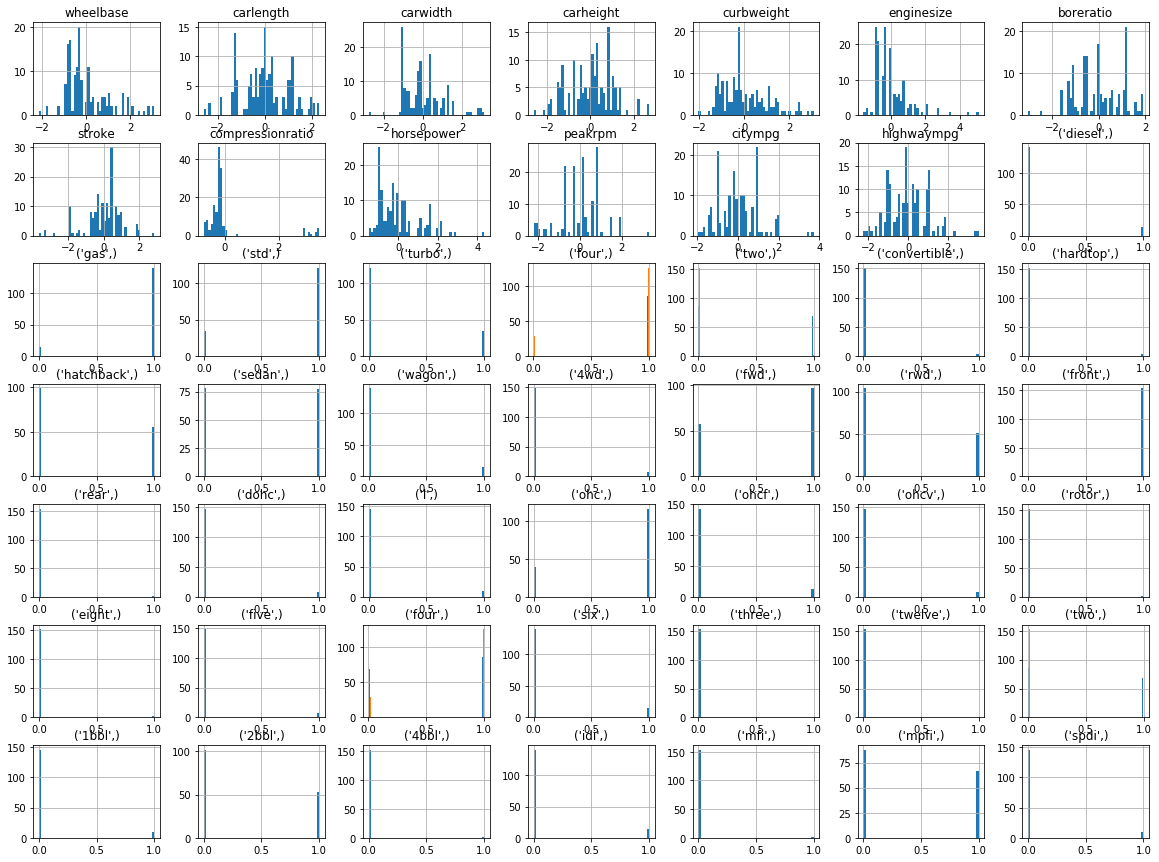

In [61]:
# Plotting all data on histogram
train_x_e.hist(bins=50, figsize=(20,15))
plt.show()

### part g

In [62]:
# To obtain correlation matrix we introduuce a new Dataframe containing the Price columns.
# corr_num_df is the concatanated Dataframe.

corr_num_df = pd.concat([train_x_num.reset_index(drop=True),train_y.reset_index(drop=True)],axis=1,sort=False)
corr_matrix = corr_num_df.corr()
corr_list = np.absolute(corr_matrix["price"].sort_values(ascending=False))

top_5_corr = corr_list[0:5]

In [63]:
print(top_5_corr)

price         1.000000
enginesize    0.873041
curbweight    0.825639
horsepower    0.799281
carwidth      0.726373
Name: price, dtype: float64


### part h

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CA49B7048>,
      dtype=object)

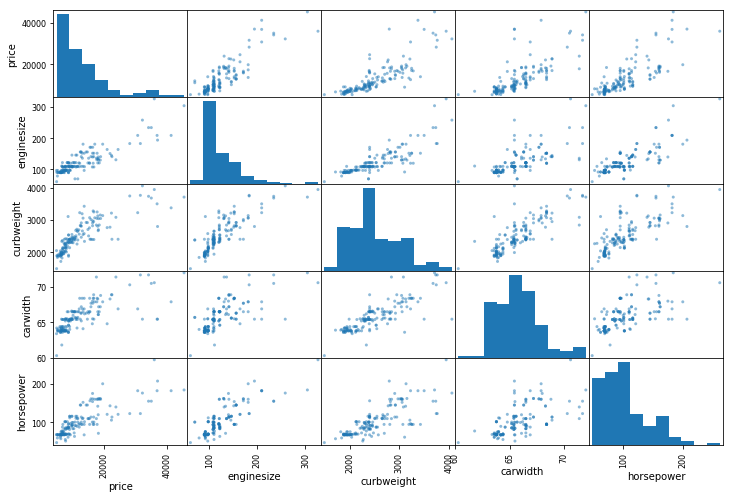

In [64]:
from pandas.plotting import scatter_matrix

attributes = ["price", "enginesize", "curbweight","carwidth","horsepower"]
scatter_matrix(corr_num_df[attributes], figsize=(12, 8))

## LINEAR REGRESSION TO PREDICT CAR PRICES

### part i

In [65]:
# Create a default linear regression and  train it with train_x_e and train_y

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_model = LinearRegression()
lr_model.fit(train_x_e, train_y)
train_predition = lr_model.predict(train_x_e)
train_mse_score =  mean_squared_error(train_y, train_predition)
print(train_mse_score)

4293452.590313229


### part j

In [66]:
# 5-fold cross validation

from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(lr_model, train_x_e, train_y,
                         scoring="neg_mean_squared_error", cv=5)
train_mse_score = abs(cross_val_scores)
print(train_mse_score)


[ 9997254.79844527  6667520.06337814  8010686.21848618 11491802.34766716
  7184954.87323614]


In [67]:
average_mse = train_mse_score.mean()
print(average_mse)

8670443.660242578


### part k

In [68]:
# Get test data to car_data_test and split it to test_x and test_y
# price column dropped and copied to a new dataframe

car_data_test = pd.read_csv("test.csv")
car_data_test.head(2)

test_x = car_data_test.drop("price", axis=1)
test_y_series = car_data_test["price"].copy()
test_y = test_y_series.to_frame() 

In [69]:
# As maked in train data we drop null price values both from test_y and test_x

null_price_values = test_y[test_y.isnull().any(axis=1)]
price_null_indexes = null_price_values.index.values
test_y= test_y.dropna()
test_x = test_x.drop(price_null_indexes,axis=0)

In [70]:
# Filling the missing values with median can be applied to numerical columns. So
# First we drop the categorical column from test_x and put them to test_x_num
# Then fill the missing values of numerical test_x_num with median. And then Standart scale it.
test_x_cat = test_x[categorical_columns].copy()
test_x = test_x.drop(categorical_columns, axis=1)


imp_test = imputer.fit_transform(test_x)
test_x = pd.DataFrame(imp_test, columns=test_x.columns,
                          index=test_x.index)

test_x_sca = scaler.fit_transform(test_x)
test_x = pd.DataFrame(test_x_sca,test_x.index,test_x.columns)

test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 40
Data columns (total 13 columns):
wheelbase           40 non-null float64
carlength           40 non-null float64
carwidth            40 non-null float64
carheight           40 non-null float64
curbweight          40 non-null float64
enginesize          40 non-null float64
boreratio           40 non-null float64
stroke              40 non-null float64
compressionratio    40 non-null float64
horsepower          40 non-null float64
peakrpm             40 non-null float64
citympg             40 non-null float64
highwaympg          40 non-null float64
dtypes: float64(13)
memory usage: 4.4 KB


In [71]:
for data_cat in categorical_columns:
    x_cat = test_x_cat[[data_cat]]
    cat_encoder = OneHotEncoder(sparse=False)
    car_cat_1hot = cat_encoder.fit_transform(x_cat)
    df_multilabel_data = pd.DataFrame(car_cat_1hot, columns=cat_encoder.categories_)
    test_x = pd.concat([test_x.reset_index(drop=True),df_multilabel_data.reset_index(drop=True)],axis=1,sort=False)

In [72]:
test_x.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,"(three,)","(twelve,)","(two,)","(1bbl,)","(2bbl,)","(4bbl,)","(idi,)","(mfi,)","(mpfi,)","(spdi,)"
0,0.932810,1.326619,2.076961,0.566013,0.430246,-0.042623,-0.712848,0.347447,-0.498378,0.047788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.517275,-0.097773,-1.500195,-0.092620,-0.701135,-0.583212,-0.859073,0.987246,-0.379717,-0.479532,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
test_y.head(2)

,price
0,18920.0
1,10295.0


### part l

In [74]:
# model prediction on test_x dataframe
# print MSE score and Co-efficients
predicted_values = lr_model.predict(test_x)

In [75]:
print(predicted_values[10:13])

[[23512.58392894]
 [13999.19340331]
 [ 6287.68406375]]


In [76]:
test_mse_score = mean_squared_error(test_y, predicted_values)
print(test_mse_score)

15206608.022007544


In [77]:
print(lr_model.coef_)

[[ -182.50390789    17.77791293   482.81638969   104.58617988
   1594.18156825  4256.71313249   -38.99302906 -1321.89317472
    384.75573887  1307.10308185   517.30038623  -656.6777968
    909.82948041   303.83998109  -303.83998109  -833.75837893
    833.75837893  -159.35665013   159.35665013  1542.4145792
   -102.94119627 -1139.24923892    17.7188586   -317.9430026
   -356.18410821    12.7432581    343.44085011 -3344.81001829
   3344.81001829  -372.6897473    504.78138728  4017.61826575
    988.4968924  -6495.11386517  1356.90706703  9413.84688919
  -2844.87981562 -4736.26827118  -264.02978738  3202.35838074
  -6127.93446278  1356.90706703   804.76067885   118.99207544
   1356.90706703   303.83998109 -1239.14937015   616.95778215
  -1962.30821441]]


### part m

In [78]:
# From the above correlation graph enginesize shouldbe a good choice for 2-degree polynomial feature.
# get the enginesize polynomial featues and convert it to a dataframe.
# then we concatanate the dataframe with train_x_e to train_x_m
# then we drop enginesize becouse the duplication of data

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
enginesize_poly = poly_features.fit_transform(train_x_e[["enginesize"]])
enginesize_columns = poly_features.get_feature_names()
df_multilabel_data = pd.DataFrame(enginesize_poly, columns=enginesize_columns)
train_x_m = pd.concat([train_x_e.reset_index(drop=True),df_multilabel_data.reset_index(drop=True)],axis=1,sort=False)
train_x_m = train_x_m.drop("enginesize", axis=1)

In [79]:
train_x_m.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,...,"(two,)","(1bbl,)","(2bbl,)","(4bbl,)","(idi,)","(mfi,)","(mpfi,)","(spdi,)",x0,x0^2
0,1.040486,1.218356,0.697865,1.103479,-0.217359,-0.000506,-0.298040,-0.115772,0.312992,0.600889,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.427546,0.182796
1,-0.729389,-0.266100,-1.003614,-0.089818,-0.968641,-0.628165,0.134277,-0.142667,-0.909358,0.150404,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.679464,0.461671


In [80]:
# we create a default linear regression model for polynomial feature
# we train it on train_x_m and get 5-fold cross validation scores
lr_model_poly = LinearRegression()
lr_model_poly.fit(train_x_m,train_y)
cross_val_scores = cross_val_score(lr_model_poly, train_x_m, train_y,
                         scoring="neg_mean_squared_error", cv=5)
train_mse_score = abs(cross_val_scores)

In [81]:
average_mse = train_mse_score.mean()
print(average_mse)

10557579.186065381


### part n

In [82]:
# We create a default Lasso regularization model and perform 5-fold cross validation on train_x_m and train_y
# get the absolute value of MSE scores

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_x_m,train_y)
cross_val_scores = cross_val_score(lasso, train_x_m, train_y,
                         scoring="neg_mean_squared_error", cv=5)
train_mse_score = abs(cross_val_scores)
print(train_mse_score)

[ 9197451.74517269  5333165.82614389  6106733.05882043  8687335.55033289
 21352620.40970892]


In [83]:
average_mse = train_mse_score.mean()
print(average_mse)

10135461.318035763


### part o

--------min error5333165.826143889---------------
--------alpha1---------------
--------min error4705052.176444028---------------
--------alpha11---------------
--------min error4428666.5408213725---------------
--------alpha21---------------
--------min error4356663.880042934---------------
--------alpha31---------------


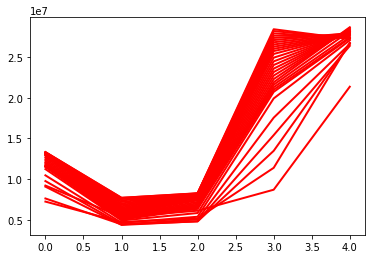

In [113]:
# first we create a dict for alpha paramaters that is array between 1 -300
# we calculate 5- fold cross val for all alpha values in array then store the values in variables.

from sklearn.model_selection import GridSearchCV
alpha_params = np.arange(1,300,10)
min_error = 0
min_alpha = 1
for alpha in alpha_params:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_x_m,train_y)
    cross_val_scores = cross_val_score(lasso, train_x_m, train_y,
                         scoring="neg_mean_squared_error", cv=5)
    plt.plot(abs(cross_val_scores), "r", linewidth="2")
    all_score =abs(cross_val_scores)
    all_score = np.sort(all_score)
    all_scores = np.append(all_scores,all_score)
    if (min_error == 0 or all_score[0] < min_error):
        min_error = all_score[0]
        min_alpha = alpha

In [111]:
print(f"Minimum error was {round(min_error, 2)} at alpha {min_alpha}")

Minimum error was 4356663.88 at alpha 31


In [ ]:
plt.plot(all_scores, "r", linewidth="2")

### part p

In [ ]:
# we create a SVM 5-fold grid search with the  params defined in svr_params.
# and calculate the best params and best score

from sklearn.svm import SVR
svr_params = [{'kernel': ['rbf'], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                     'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0]},
                    {'kernel': ['linear'], 'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0]}]
grid_search_svr = GridSearchCV(SVR(), svr_params, cv=5,scoring='neg_mean_squared_error', return_train_score=True)
grid_search_svr.fit(train_x_e,train_y)

best_mse = np.absolute(grid_search_svr.best_score_)
best_parameters = grid_search_svr.best_params_ 

In [ ]:
print(best_mse)
print(best_parameters)